In [49]:
import dill
import numpy as np
from scipy.sparse import lil_matrix

mesh = dill.load(open("meshes/hopper0_mdim.pkl", 'rb'))
mesh2 = dill.load(open("meshes/hopper0_iden.pkl", 'rb'))
mesh3 = dill.load(open("meshes/hopper0_iden_noise.pkl", 'rb'))
mesh4 = dill.load(open("meshes/hopper0_mdim_noise.pkl", 'rb'))

In [70]:
def make_prob_list(mesh):
    T = lil_matrix((len(mesh), len(mesh)))
    T[0,0] = 1
    for box in mesh.values():
        for trans_id in box.trans_list:
            T[box.id, trans_id] += 1/len(box.trans_list)

    T = T.tocsc()
    
    col_sums = []
    for i in range(T.shape[1]):
        col_sums.append(np.sum(T[:,i]))
        
    col_sums = sorted(col_sums, reverse=True)[:-1]
    
    mass_total = sum(col_sums)
    sum_so_far = 0
    cum_sums = []

    for s in col_sums:
        sum_so_far += s
        cum_sums.append(sum_so_far)

        
    return cum_sums/mass_total, col_sums


In [71]:
prob_so_far1, col_sums = make_prob_list(mesh)
prob_so_far2, col_sums2 = make_prob_list(mesh2)
prob_so_far3, col_sums3 = make_prob_list(mesh3)
prob_so_far4, col_sums4 = make_prob_list(mesh4)

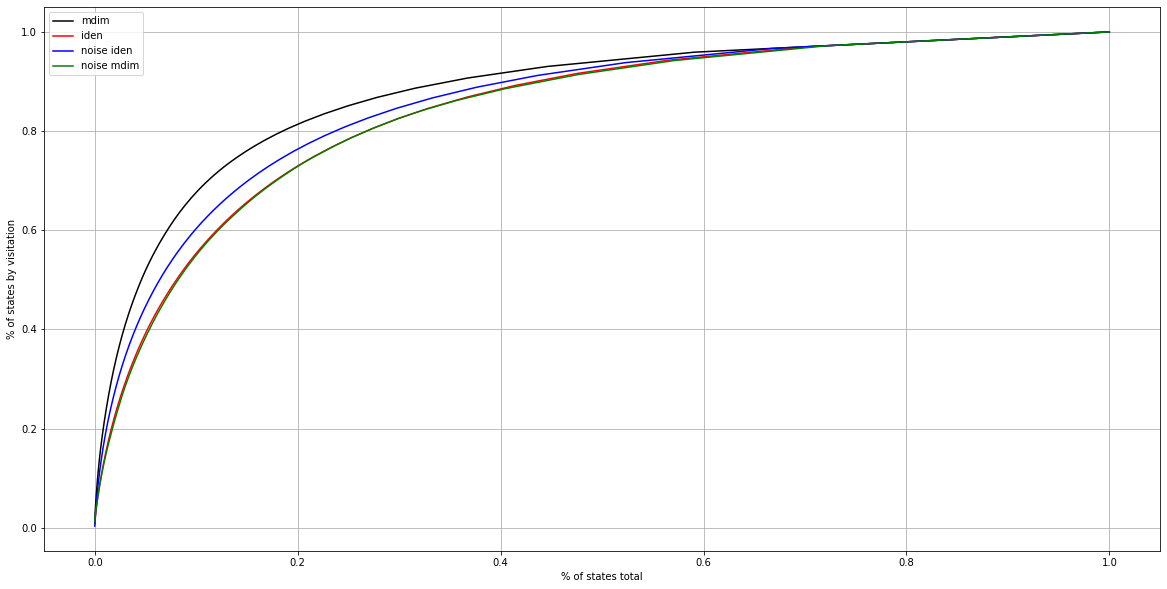

In [72]:
pstates_so_far4 = np.linspace(0,1,prob_so_far4.shape[0])
pstates_so_far1 = np.linspace(0,1, prob_so_far1.shape[0])
pstates_so_far2 = np.linspace(0,1, prob_so_far2.shape[0])
pstates_so_far3 = np.linspace(0,1, prob_so_far3.shape[0])


plt.figure(figsize=(20,10))
plt.plot(pstates_so_far, prob_so_far1, color='k')
plt.plot(pstates_so_far2, prob_so_far2, color='r')
plt.plot(pstates_so_far3, prob_so_far3, color='b')
plt.plot(pstates_so_far4, prob_so_far4, color='g')


plt.legend(['mdim', 'iden', 'noise iden', 'noise mdim'])
plt.xlabel('% of states total')
plt.ylabel('% of states by visitation')

plt.grid('both')

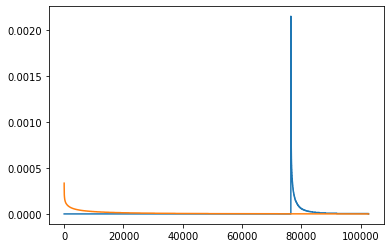

In [42]:


for _ in range(len(col_sums2) - len(col_sums)):
    col_sums.append(0)

plt.plot((col_sums/sum(col_sums))[::-1])
plt.plot((col_sums2/sum(col_sums2))[::-1])

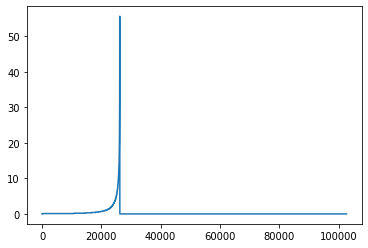

In [45]:
plt.plot(col_sums)